In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt

CROSSPATH = '/Users/cosinga/overleaf/higal_cross/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/rvb/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
pplib.imports()

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/1-23_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 12, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.displayAs('post_process', ['corr_coef', 'theory_bias', 'obs_bias'], 
             ['r', '$b_{\\mathrm{th}}$', '$b_{\\mathrm{obs}}$'])

ds.setColors('post_process', ['pink', 'lime', 'cyan'], ['corr_coef', 'theory_bias', 'obs_bias'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setColors('space', ['green', 'orange'], ['real', 'redshift'])
ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setColors('snapshot', 'viridis', snapshots)

ds.setXLabel(pplib.wnum())

The row values for space: ['real']
The column values for color: ['blue', 'red']


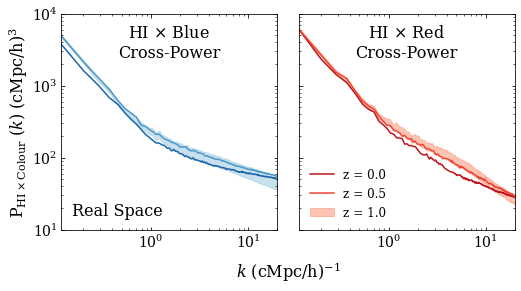

In [4]:

 
ip = {'is_auto':False, 'space':['real'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', 'space', 'color', ip)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill()
fg.setFunc({'figrid_process':'fill', 'snapshot':67}, fill_mean)
fg.setFunc({'figrid_process':'fill', 'snapshot':99}, fill_mean)
fg.plotArgs({'figrid_process':'fill', 'snapshot':50}, alpha = 0.5)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
# fg.axisArgs(slc = 'redshift', ylim = (.1, 1e4))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.1]
fg.legendArgs(loc = 'lower left')
fg.gspecArgs(xborder = XBORDER, yborder = [0.25, 0.25], wspace = 0.1, hspace = 0.1)
# fg.tickArgs(slc = 'real', labelbottom = False)
fg.setYLabel(pplib.pklab('HI', 'Colour'))
fg.setXLabel(pplib.wnum())
fg.plot()

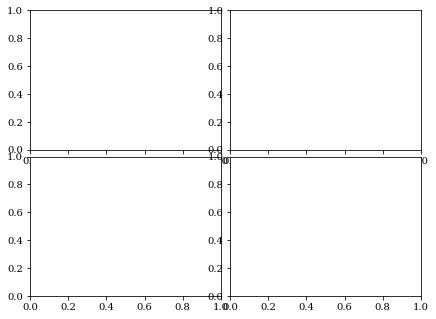

In [4]:
fig, axes = plt.subplots(2, 2, figsize = (7, 5.25), gridspec_kw = {'wspace':0.05, 'hspace':0.05})


The row values for : ['no key found']
The column values for color: ['blue', 'red']


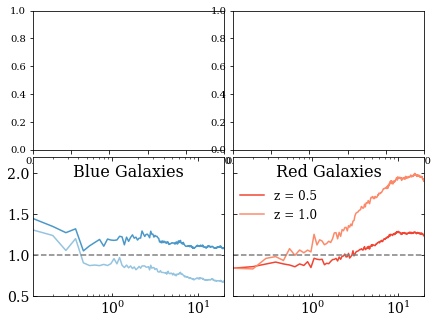

<Figure size 529.2x291.6 with 0 Axes>

In [5]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red'], 'space':['real']}

fg = ds.figrid('snapshot', '', 'color', ip)
fg.axisArgs(ylim = (0.5, 2.2), yscale = 'linear')
fg.autoNorm({'snapshot':99})
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = (0.01, 0.5), slc = (0, 1))
fg.setDefaultTicksParams()
fg.colLabels(['Blue Galaxies', 'Red Galaxies'])

fg.plotOnes()
axesarr = np.empty((1, 2), dtype = 'object')
axesarr[0, 0] = axes[1][0]
axesarr[0, 1] = axes[1][1]
fg.plot(axes = axesarr)
fig

The row values for : ['no key found']
The column values for color: ['resolved']


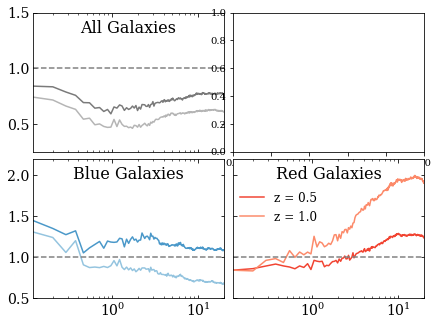

<Figure size 291.6x291.6 with 0 Axes>

In [6]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['resolved'], 'space':['real']}

fg = ds.figrid('snapshot', '', 'color', ip)
fg.axisArgs(ylim = (0.25, 1.5), yscale = 'linear')
fg.autoNorm({'snapshot':99})
fg.setCmap('Greys', snapshots, {'color':'resolved'},)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(rm_legend = True)
fg.setDefaultTicksParams()
fg.tickArgs(labelbottom = False)
fg.colLabels(['All Galaxies'])
fg.setYLabel(pplib.pkrat('Opt', '0'))
fg.plotOnes()
axesarr = np.empty((1, 1), dtype = 'object')
axesarr[0, 0] = axes[0, 0]
fg.plot(axes = axesarr)
fig

The row values for : ['no key found']
The column values for : ['no key found']


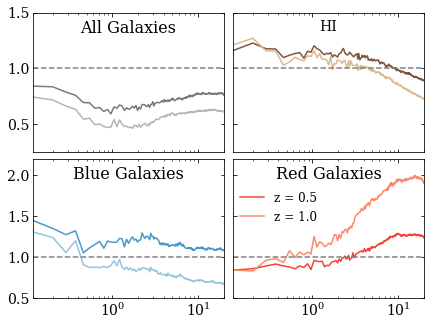

<Figure size 291.6x291.6 with 0 Axes>

In [7]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'snapshot':snapshots, 'space':['real'],
     'snapshot' : [99, 67, 50], 'fieldname':['hiptl', 'vn']}
fg = ds.figrid('snapshot', '', '', ip)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1), wspace = 0, hspace = 0)
fg.setCmap(['#ddb892', '#ddb892', '#7f5539'], snapshots)
fg.autoNorm({'snapshot':99}, ['model'])
fg.autoFill(alpha = 0.6)

fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.setYLabel('')
fg.tickArgs(labelleft = False, labelbottom = False)
# fg.legendArgs(loc = 'lower left')
fg.legendArgs(rm_legend = True)
fg.axisArgs(yscale = 'linear', ylim = [0.25, 1.5])
fg.plotOnes()
fg.setXLabel('')
fg.colLabels(['HI'], pos = [0.5, 0.95])
fg.colLabelArgs(va = 'top', fontsize = 14)
axesarr = np.empty((1, 1), dtype = 'object')
axesarr[0, 0] = axes[0, 1]
fg.plot(axes = axesarr)
fig

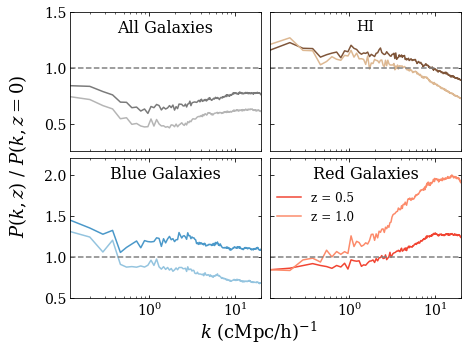

In [8]:
fig.text(0, 0.5, "$P (k, z)$ / $P (k, z = 0)$", rotation = 'vertical', va = 'center', ha = 'left', fontsize = 18)
fig.text(0.5, 0, pplib.wnum(), va = 'bottom', ha = 'center', fontsize = 18)
fig

In [48]:
# fig.savefig(CROSSPATH + 'auto_zevo.pdf', dpi = 200, bbox_inches = 'tight')

The row values for : ['no key found']
The column values for : ['no key found']


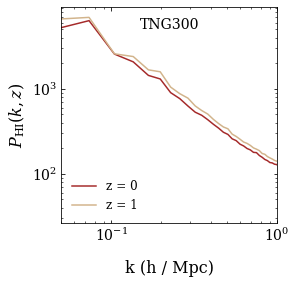

In [23]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng300', 'snapshot':[99, 50], 'space':['real'],
     'snapshot' : [99, 67, 50], 'fieldname':['hiptl', 'vn']}
fg = ds.figrid('snapshot', '', '', ip)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1), wspace = 0, hspace = 0)
fg.plotArgs({'snapshot':99}, color = 'brown', label = 'z = 0')
fg.plotArgs({'snapshot':50}, color = 'tan', label = 'z = 1')

# fg.autoNorm({'snapshot':99}, ['model'])
fg.autoFill(alpha = 0.6)
fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.setYLabel(r'$P_{\mathrm{HI}}(k, z)$')
fg.legendArgs(loc = 'lower left')
fg.axisArgs(xlim = [0.05, 1])
fg.setXLabel('k (h / Mpc)')
fg.colLabels(['TNG300'], pos = [0.5, 0.95])
fg.colLabelArgs(va = 'top', fontsize = 14)
fg.plot()


The row values for : ['no key found']
The column values for : ['no key found']


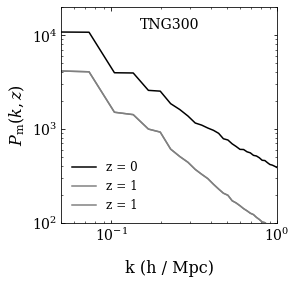

In [26]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng300', 'snapshot':[99, 50], 'space':['real'], 'fieldname':['ptl'],
     'ptl_species':['no key found', 'ptl']}
fg = ds.figrid('snapshot', '', '', ip)
fg.plotArgs({'snapshot':99}, color = 'black', label = 'z = 0')
fg.plotArgs({'snapshot':50}, color = 'gray', label = 'z = 1')
fg.setYLabel(r'$P_{\mathrm{m}}(k, z)$')
fg.legendArgs(loc = 'lower left')
fg.axisArgs(xlim = [0.05, 1], ylim = (1e2, 2e4))
fg.setXLabel('k (h / Mpc)')
fg.colLabels(['TNG300'], pos = [0.5, 0.95])
fg.colLabelArgs(va = 'top', fontsize = 14)
fg.plot()

# Comparing to MEERKAT values

In [77]:
mkpk = np.loadtxt('../../obs_data/paul_valTBLR.txt', delimiter = ',')
mkpk = mkpk.T

In [78]:
print(mkpk[0, :])
print(mkpk[1, :])

[ 0.42687727  0.72544762  1.2501718   2.03746853  3.36722958  5.18981068
  7.99890066  0.42687727  0.73564225  1.2501718   2.03746853  3.32056603
  5.18981068  7.99890066  0.51898107  0.869749    1.4575933   2.44274868
  4.09374901  6.86062429 11.49756995  0.3096771   0.52627425  0.88197149
  1.4575933   2.44274868  4.151278    6.86062429  0.42096154  0.74598015
  1.2501718   2.03746853  3.32056603  5.2627425   8.11130831]
[3.75036964e+01 1.40652724e-01 2.34622885e+00 1.00000000e+00
 1.97831888e-01 3.44379298e-01 2.24828753e-01 5.50478981e+01
 3.30003479e+00 2.90377501e+00 1.18597101e+00 2.90377501e-01
 4.26215883e-01 4.26215883e-01 3.59381366e+01 1.18597101e-01
 2.34622885e+00 1.00000000e+00 1.97831888e-01 3.44379298e-01
 2.24828753e-01 3.59381366e+01 1.18597101e-01 2.24828753e+00
 1.00000000e+00 1.97831888e-01 3.30003479e-01 2.24828753e-01
 1.74076738e+01 2.15443469e-02 1.74076738e+00 8.07992645e-01
 1.04356263e-01 2.44843675e-01 3.30003479e-02]


In [79]:
mkpkvals = mkpk[1, :7]
mkkvals = mkpk[0, :7]
yerr_plus = mkpk[1, 7:14]
xerr_plus = mkpk[0, 14:21]
xerr_minus = mkpk[0, 21:28]
yerr_minus = mkpk[1, 28:]
yerr = [mkpkvals - yerr_minus, yerr_plus - mkpkvals]
xerr = [mkkvals - xerr_minus, xerr_plus - mkkvals]
xerr, yerr

([array([0.11720017, 0.19917337, 0.36820031, 0.57987523, 0.92448089,
         1.03853267, 1.13827637]),
  array([0.0921038 , 0.14430138, 0.2074215 , 0.40528016, 0.72651943,
         1.67081361, 3.4986693 ])],
 [array([20.09602255,  0.11910838,  0.60546146,  0.19200736,  0.09347563,
          0.09953562,  0.19182841]),
  array([17.5442017 ,  3.15938207,  0.55754616,  0.18597101,  0.09254561,
          0.08183658,  0.20138713])])

In [80]:
mkpk = np.loadtxt('../../obs_data/paul_valRTLB_0.44.txt', delimiter = ',')
mkpk = mkpk.T
print(mkpk[0, :])
print(mkpk[1, :])

[ 0.34474661  0.61305579  1.01449521  1.70313863  2.81838293  4.34010264
  7.07945784  0.24406191  0.41567126  0.69783058  1.20572981  2.11348904
  3.54813389  6.0429639   0.34474661  0.61305579  1.01449521  1.67880402
  2.81838293  4.27809082  7.07945784  0.40973211  0.71820761  1.20572981
  2.05352503  3.54813389  5.95662144 10.29200527  0.34474661  0.61305579
  1.01449521  1.70313863  2.81838293  4.34010264  7.07945784]
[5.21172068e+01 5.93724411e-01 4.38035626e+00 1.54411359e+00
 1.00000000e+00 5.68482344e-01 2.96277119e-01 5.21172068e+01
 6.20087291e-01 4.38035626e+00 1.54411359e+00 1.00000000e+00
 5.68482344e-01 2.83680960e-01 8.04748873e+01 4.57485526e+00
 4.99014549e+00 1.75906958e+00 1.09077669e+00 7.06409618e-01
 6.76376763e-01 5.21172068e+01 5.93724411e-01 4.38035626e+00
 1.47846593e+00 9.57485213e-01 5.68482344e-01 2.83680960e-01
 2.49015520e+01 3.23172176e-02 3.37521845e+00 1.24262367e+00
 8.40481777e-01 4.19412635e-01 3.23172176e-02]


In [81]:
mkpkvals_4 = mkpk[1, :7]
mkkvals_4 = mkpk[0, :7]
xerr_minus = mkpk[0, 7:14]
yerr_plus = mkpk[1, 14:21]
xerr_plus = mkpk[0, 21:28]

yerr_minus = mkpk[1, 28:]
yerr_4 = [mkpkvals_4 - yerr_minus, yerr_plus - mkpkvals_4]
xerr_4 = [mkkvals_4 - xerr_minus, xerr_plus - mkkvals_4]
xerr_4, yerr_4

([array([0.1006847 , 0.19738453, 0.31666462, 0.49740882, 0.70489389,
         0.79196874, 1.03649394]),
  array([0.0649855 , 0.10515181, 0.19123461, 0.35038639, 0.72975096,
         1.6165188 , 3.21254743])],
 [array([27.21565485,  0.56140719,  1.00513781,  0.30148992,  0.15951822,
          0.14906971,  0.2639599 ]),
  array([28.35768051,  3.98113085,  0.60978922,  0.21495599,  0.09077669,
          0.13792727,  0.38009964])])

In [82]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'snapshot':snapshots, 'space':['redshift'],
     'snapshot' : [67], 'fieldname':['vn']}
dc = ds.getMatching(ip)
tngk = dc[0].data[0].copy(); tngpk = dc[0].data[1].copy()
tngk[:] *= 0.6774 * (1 + 0.32) # from h/cMpc -> 1/Mpc
tngpk[:] *= 0.6774**3 * (1 + 0.32)**3 * (0.1132) ** 2 # from (h / cMpc)^3 to (mK^2 1/Mpc^3)


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

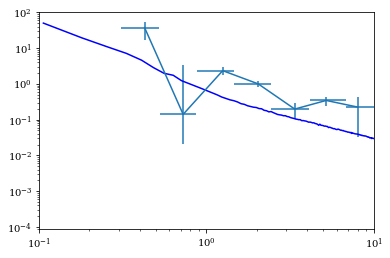

In [83]:
plt.errorbar(mkkvals, mkpkvals, xerr = xerr, yerr = yerr)
plt.plot(tngk, tngpk, color = 'blue')
plt.loglog()
plt.xlim(1e-1, 10)
plt.xlabel

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

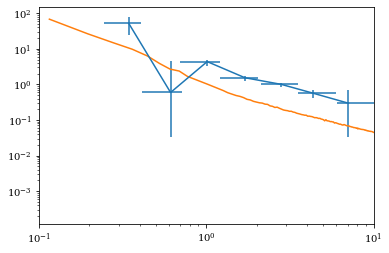

In [85]:
tngk = dc[0].data[0].copy(); tngpk = dc[0].data[1].copy()
tngk[:] *= 0.6774 * (1 + 0.44) # from h/cMpc -> 1/Mpc
tngpk[:] *= 0.6774**3 * (1 + 0.44)**3 * (0.116) ** 2 # from (h / cMpc)^3 to (mK^2 1/Mpc^3)
plt.errorbar(mkkvals_4, mkpkvals_4, xerr = xerr_4, yerr = yerr_4)
plt.plot(tngk, tngpk)
plt.loglog()
plt.xlim(1e-1, 10)
plt.xlabel

The row values for : ['no key found']
The column values for : ['no key found']


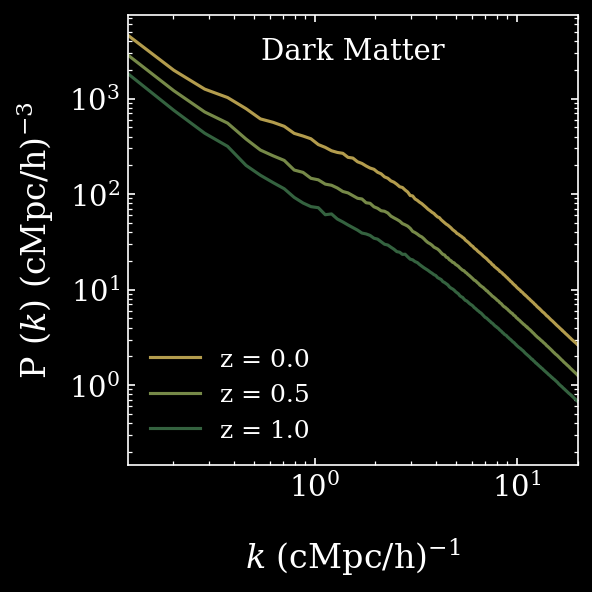

In [35]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'snapshot':[99, 67, 50], 'space':['real'], 'fieldname':['ptl'],
     'ptl_species':['dm']}
fg = ds.figrid('snapshot', '', '', ip)
fg.plotArgs({'snapshot':99}, color = '#b39c4d', label = 'z = 0.0')
fg.plotArgs({'snapshot':67}, color = '#768948', label = 'z = 0.5')
fg.plotArgs({'snapshot':50}, color = '#34623f', label = 'z = 1.0')
fg.setYLabel(pplib.pklab(''))
fg.legendArgs(loc = 'lower left')
fg.figArgs(dpi = 150)
fg.setXLabel(pplib.wnum())
fg.colLabels(['Dark Matter'], pos = [0.5, 0.95])
pplib.darkmode(fg)
fg.colLabelArgs(va = 'top', fontsize = 14)
fg.plot()

The row values for : ['no key found']
The column values for color: ['resolved']


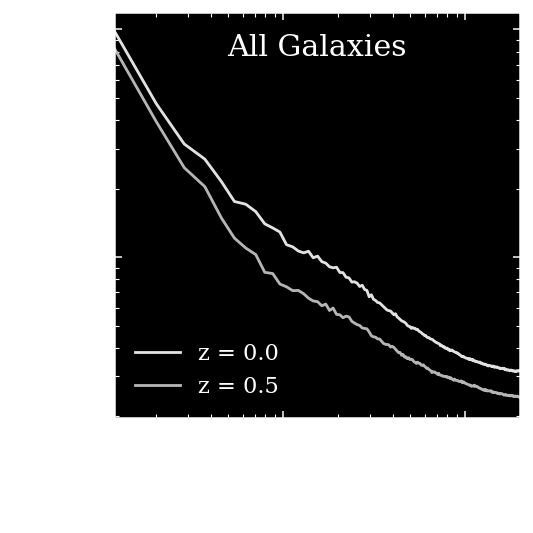

In [24]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['resolved'], 'space':['real']}
fg = ds.figrid('snapshot', '', 'color', ip)
fg.setCmap('Greys', snapshots +  ['', ''], {'color':'resolved'})
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'lower left')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pklab('Gal'))
fg.colLabels(['All Galaxies'])
pplib.darkmode(fg)
fg.plot()
fg.fig.set(facecolor = 'none')
fg.fig.savefig('allgal_zevo_poster.png', dpi = 200, bbox_inches = 'tight')

The row values for : ['no key found']
The column values for color: ['red']


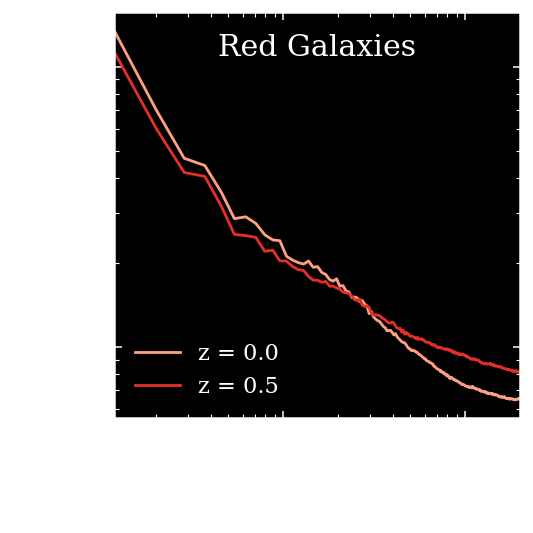

In [23]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['red'], 'space':['real']}
fg = ds.figrid('snapshot', '', 'color', ip)
fg.setCmap('Reds', ip['snapshot'], {'color':'red'},)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'lower left')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pklab('Gal'))
fg.colLabels(['Red Galaxies'])
fg.figArgs(dpi = 135)
pplib.darkmode(fg)
fg.plot()
fg.fig.set(facecolor = 'none')
fg.fig.savefig('red_zevo_poster.png', dpi = 200, bbox_inches = 'tight')

The row values for : ['no key found']
The column values for color: ['red']


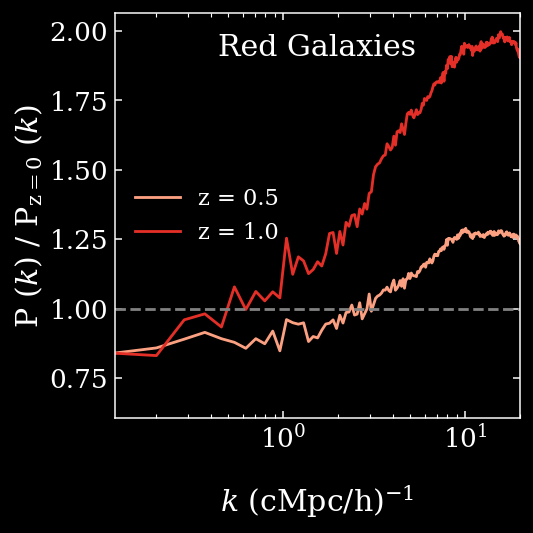

In [30]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['red'], 'space':['real']}
fg = ds.figrid('snapshot', '', 'color', ip)
fg.setCmap('Reds', ip['snapshot'][1:], {'color':'red'},)
fg.autoNorm({'snapshot':99})
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'center left')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pkrat('', 'z = 0'))
fg.colLabels(['Red Galaxies'])
fg.figArgs(dpi = 135)
fg.axisArgs(yscale = 'linear')
fg.plotOnes()
pplib.darkmode(fg)
fg.plot()

The row values for : ['no key found']
The column values for color: ['blue']


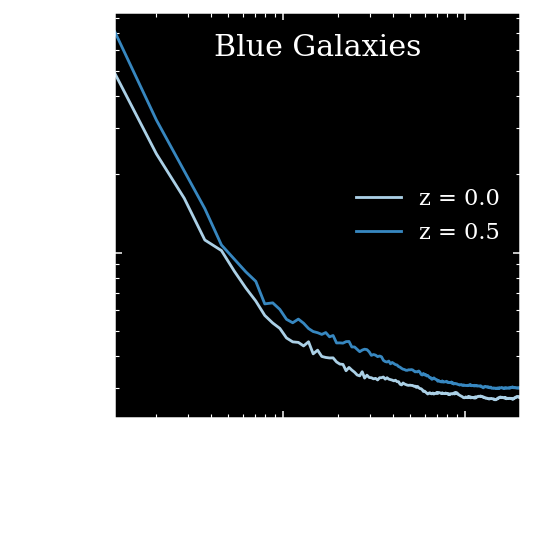

In [26]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue'], 'space':['real']}
fg = ds.figrid('snapshot', '', 'color', ip)
snapshots = ip['snapshot']
fg.setCmap('Blues', snapshots, {'color':'blue'},)
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'center right')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pklab('Gal'))
fg.colLabels(['Blue Galaxies'])
fg.figArgs(dpi = 135)
pplib.darkmode(fg)
fg.plot()
fg.fig.set(facecolor = 'none')
fg.fig.savefig('blue_zevo_poster.png', bbox_inches = 'tight', dpi = 200)

The row values for : ['no key found']
The column values for color: ['blue']


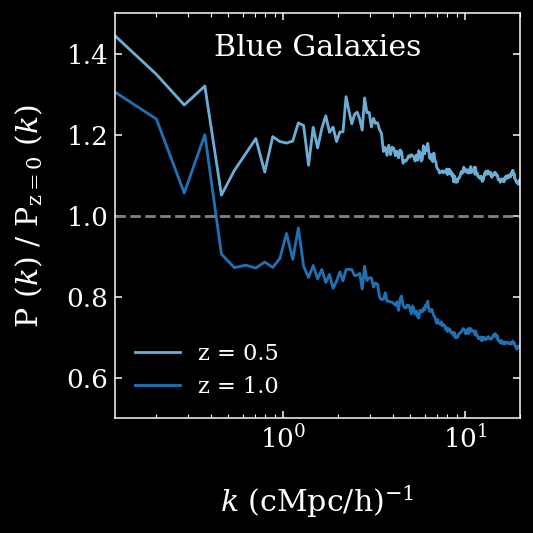

In [32]:
ip = {'is_auto':True, 'fieldname':'galaxy',
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue'], 'space':['real']}
fg = ds.figrid('snapshot', '', 'color', ip)
fg.setCmap('Blues', ip['snapshot'], {'color':'blue'},)
fg.autoNorm({'snapshot':99})
fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'lower left')
fg.setDefaultTicksParams()
fg.axisArgs(yscale = 'linear', ylim = (.5, 1.5))
fg.setYLabel(pplib.pkrat('', 'z = 0'))
fg.colLabels(['Blue Galaxies'])
fg.plotOnes()
fg.figArgs(dpi = 135)
pplib.darkmode(fg)
fg.plot()

The row values for : ['no key found']
The column values for simname: ['tng100']


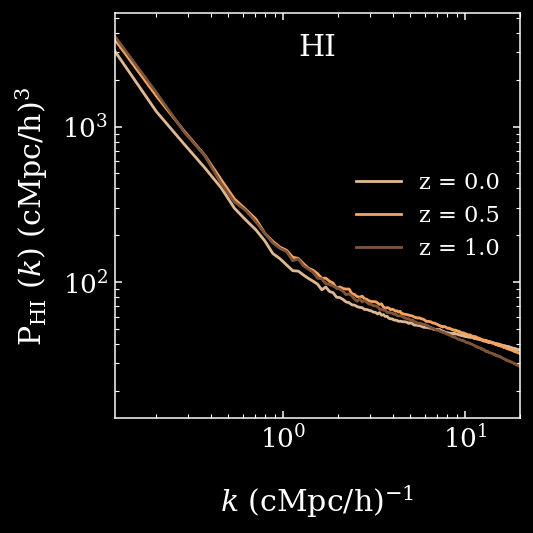

In [14]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'space':['real'],
     'snapshot' : [99, 67, 50], 'fieldname':['hiptl', 'vn']}
fg = ds.figrid('snapshot', '', 'simname', ip)
snapshots = ip['snapshot']
fg.setCmap(['#ddb892', 'sandybrown', '#7f5539'], snapshots)
fg.autoFill(alpha = 0.6)
fg.setFunc({'figrid_process':'fill'}, fill_mean)

fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'center right')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pklab('HI'))
fg.colLabels(['HI'])

fg.figArgs(dpi = 135)
pplib.darkmode(fg)
fg.plot()
fg.fig.savefig('hi_zevo_poster.png', dpi = 200, bbox_inches = 'tight', transparent = True)

The row values for : ['no key found']
The column values for simname: ['tng100']


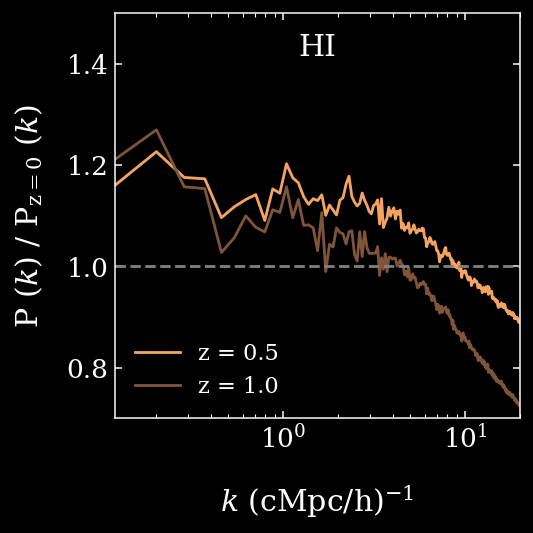

In [28]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'space':['real'],
     'snapshot' : [99, 67, 50], 'fieldname':['hiptl', 'vn']}
fg = ds.figrid('snapshot', '', 'simname', ip)
snapshots = ip['snapshot']
fg.setCmap(['#ddb892', 'sandybrown', '#7f5539'], snapshots)
fg.autoNorm({'snapshot':99}, ['model'])
fg.autoFill(alpha = 0.6)
fg.setFunc({'figrid_process':'fill'}, fill_mean)

fg.gspecArgs(yborder = (0.1, 0.25), xborder = (0.25, 0.1))
fg.legendArgs(loc = 'lower left')
fg.axisArgs(ylim = (.7, 1.5), yscale = 'linear')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.pkrat('', 'z = 0'))
fg.colLabels(['HI'])
fg.plotOnes()
fg.figArgs(dpi = 135)
pplib.darkmode(fg)
fg.plot()